# Import

In [ ]:
import os
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
root = "https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/Final"
path_file = os.path.join('dataset','train_set')
file_name = 'train_set.txt'
file = root +  "/"  + file_name

def fetch_data(file = file, path=path_file):
    if not os.path.isdir(path_file):
        os.makedirs(path_file)
    file_path = os.path.join(path_file,"train_set.txt")
    urllib.request.urlretrieve(file, file_path)
    return

def load_data(path = path_file, file_name = file_name):
    csv = os.path.join(path_file, file_name)
    return pd.read_csv(csv, sep=",",header=None, names=["X1", "X2", "y"])

fetch_data()
df = load_data()

In [3]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values
names = ['r','g','b']
feature_names = ['X1','X2']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

# Activation1

In [4]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total pa

In [5]:
X_train.shape

(342, 2)

In [6]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model1
Instructions for updating:
Use tf.cast instead.
Test loss: 0.2645536325763335
Test accuracy: 0.93002915
Model name: model2
Test loss: 0.0531837598857831
Test accuracy: 0.9941691
Model name: model3
Test loss: 0.12294487776804944
Test accuracy: 0.97084546


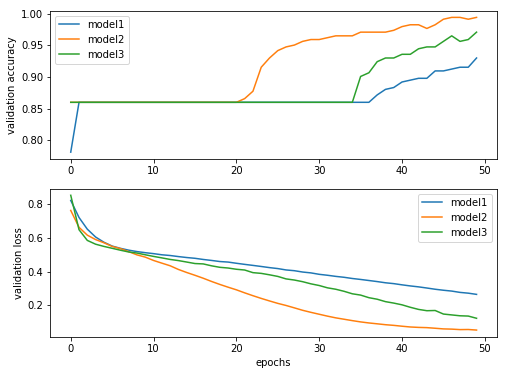

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

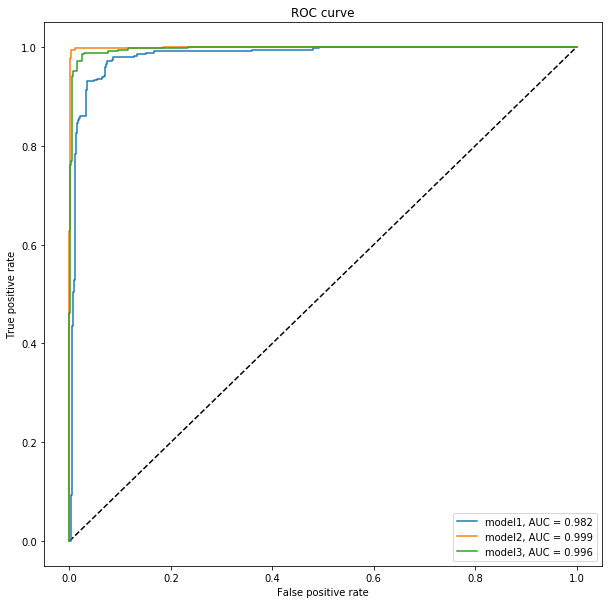

In [9]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [10]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_model_network(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.99 (+/- 0.01)


# Activation2

In [11]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='tanh'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_61 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
________________

In [12]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model1
Test loss: 0.45342432088476575
Test accuracy: 0.8600583
Model name: model2
Test loss: 0.36719395945788125
Test accuracy: 0.8688047
Model name: model3
Test loss: 0.11610772263030616
Test accuracy: 0.95626825


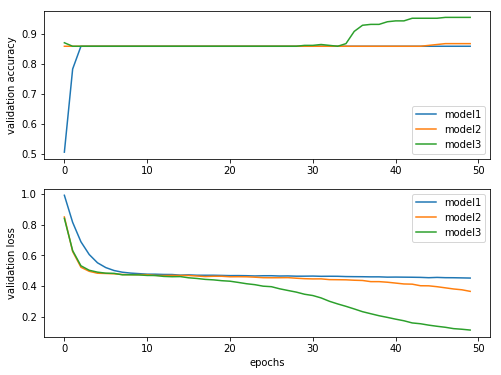

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

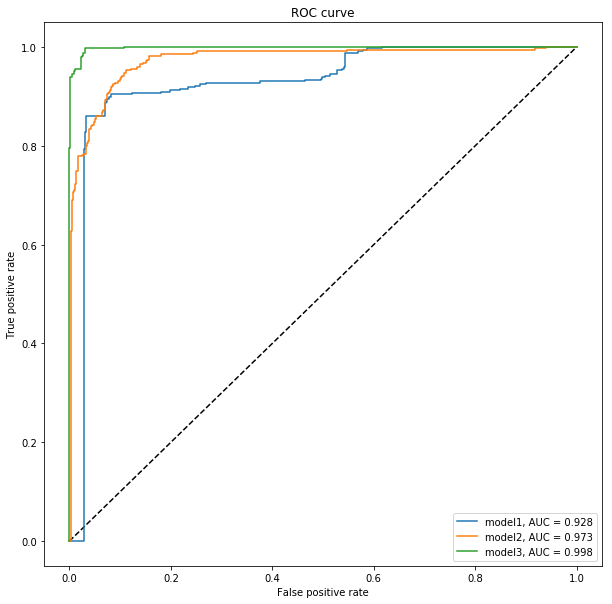

In [14]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [15]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_model_network(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.99 (+/- 0.01)


# Activation3 with 2 layers

In [18]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=2, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='tanh'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_127 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_128 (Dense)            (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_129 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_130 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_131 (Dense)            (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
________________

In [19]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model1
Test loss: 2.76394894241244
Test accuracy: 0.49562684
Model name: model2
Test loss: 10.153251700776659
Test accuracy: 0.8600583
Model name: model3
Test loss: 6.719789118530452
Test accuracy: 0.6851312


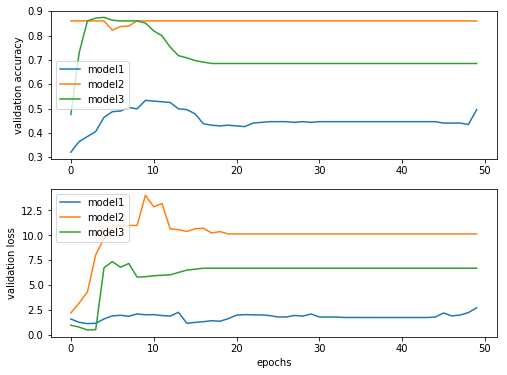

In [20]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

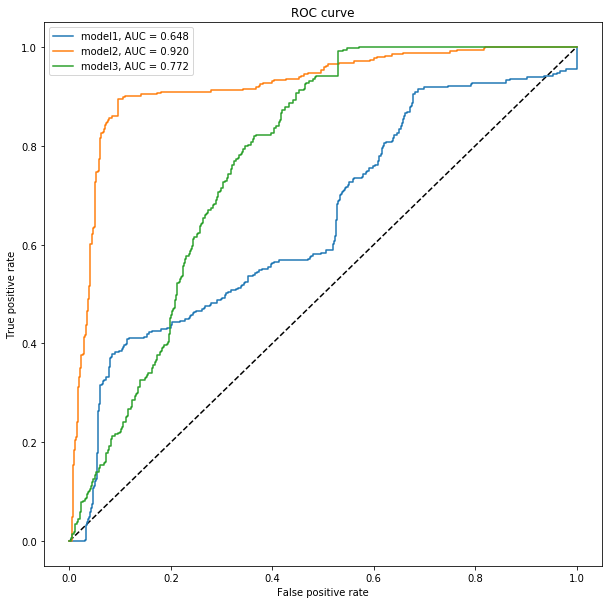

In [21]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [22]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_model_network(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

Accuracy : 0.54 (+/- 0.30)


# Based on the model runs, activation 2 with tanh and softmax gave the best results

# Build new attributes

In [29]:
df['X3'] = df['X1']**2
df['X4'] = df['X2']**2
df['X5'] = df['X2']*df['X1']

In [38]:
df = df[['X1', 'X2', 'X3', 'X4', 'X5','y']]

##  {X3, X4}

In [44]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,5].values
names = ['r','g','b']
feature_names = ['X3','X4']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [49]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=2, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_204 (Dense)            (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_206 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_207 (Dense)            (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
________________

In [50]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model1
Test loss: 0.23522389673630628
Test accuracy: 0.9183673
Model name: model2
Test loss: 0.2101591423197321
Test accuracy: 0.93586004
Model name: model3
Test loss: 0.3128278137296004
Test accuracy: 0.9183673


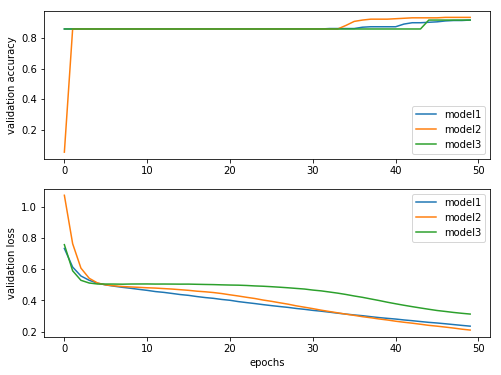

In [51]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

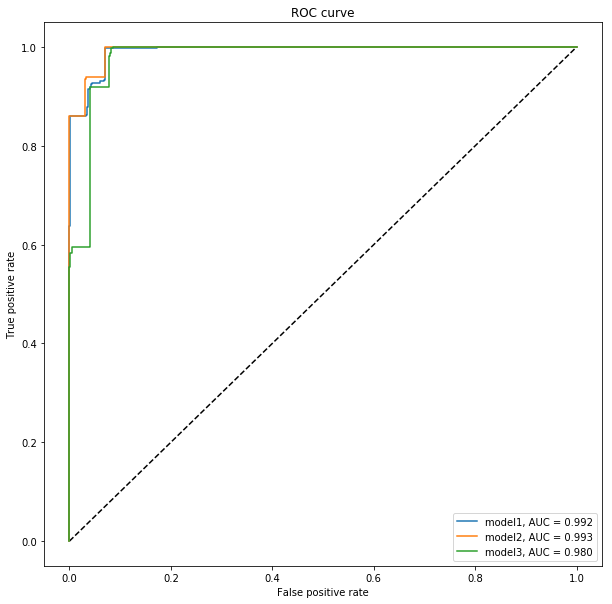

In [52]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
from tensorflow.python.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_model_network(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))

# Model 2 for X3 and X4 gave the best results

##  {X3, X5}

In [54]:
X = df.iloc[:,[2,4]].values
y = df.iloc[:,5].values
names = ['r','g','b']
feature_names = ['X3','X4']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [55]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=2, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_245 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_246 (Dense)            (None, 3)                 27        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 8)                 24        
_________________________________________________________________
dense_248 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_249 (Dense)            (None, 3)                 27        
Total params: 123
Trainable params: 123
Non-trainable params: 0
________________

In [56]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]
    

Model name: model1
Test loss: 0.4137894396531686
Test accuracy: 0.8600583
Model name: model2
Test loss: 0.42877985515330347
Test accuracy: 0.86297375
Model name: model3
Test loss: 0.46955478990738314
Test accuracy: 0.8600583


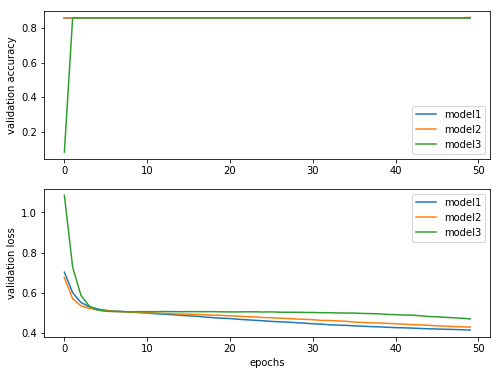

In [57]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

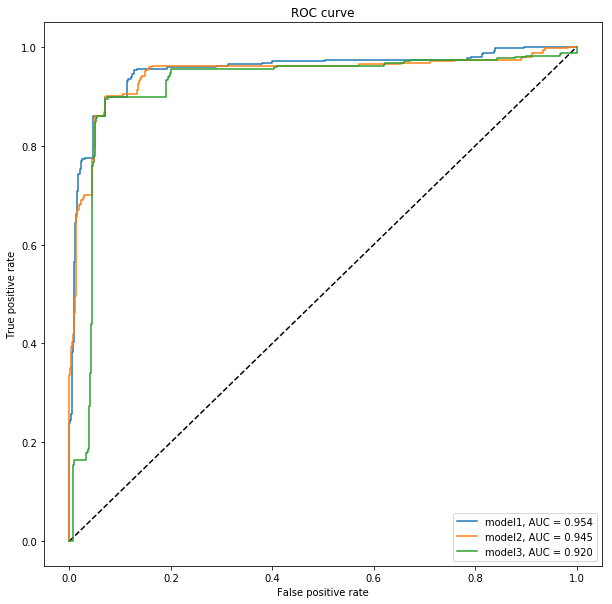

In [58]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

# Model 1 gave the best result under X3 and X5

##  {X3,X4, X5}

In [62]:
X = df.iloc[:,[2,3,4]].values
y = df.iloc[:,5].values
names = ['r','g','b']
feature_names = ['X3','X4']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [63]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=2, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 8)                 32        
_________________________________________________________________
dense_282 (Dense)            (None, 3)                 27        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_283 (Dense)            (None, 8)                 32        
_________________________________________________________________
dense_284 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_285 (Dense)            (None, 3)                 27        
Total params: 131
Trainable params: 131
Non-trainable params: 0
________________

In [64]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]
    

Model name: model1
Test loss: 0.2815325137651349
Test accuracy: 0.9154519
Model name: model2
Test loss: 0.19490811989015464
Test accuracy: 0.93877554
Model name: model3
Test loss: 0.23771021717143823
Test accuracy: 0.93877554


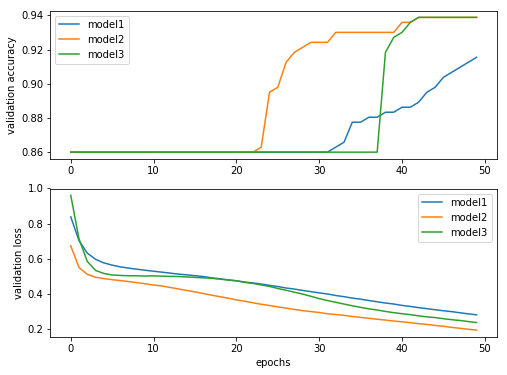

In [65]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

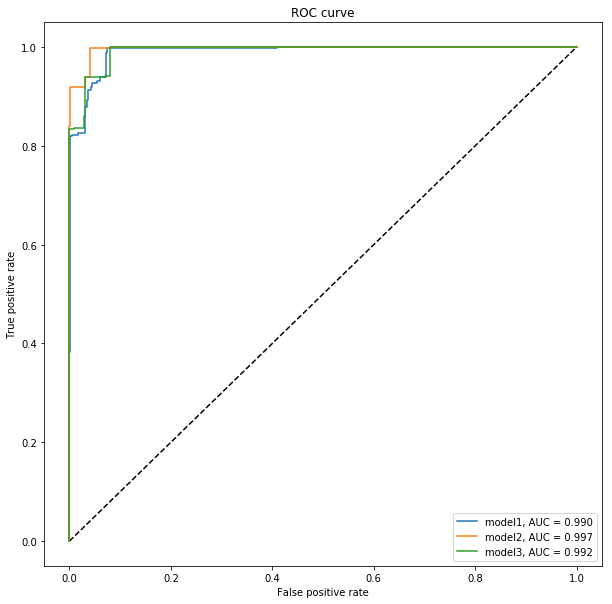

In [66]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

# Model 2 gave the best results

##  {X1, X2, X3,X4, X5}

In [68]:
X = df.iloc[:,[0,1,2,3,4]].values
y = df.iloc[:,5].values
names = ['r','g','b']
feature_names = ['X3','X4']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [69]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=2, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='sigmoid'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) for i in range(1, 4)]

for create_model in models:
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_299 (Dense)            (None, 8)                 48        
_________________________________________________________________
dense_300 (Dense)            (None, 3)                 27        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_301 (Dense)            (None, 8)                 48        
_________________________________________________________________
dense_302 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_303 (Dense)            (None, 3)                 27        
Total params: 147
Trainable params: 147
Non-trainable params: 0
________________

In [70]:
from tensorflow.python.keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model1
Test loss: 0.20777619597515629
Test accuracy: 0.9212828
Model name: model2
Test loss: 0.18874392460803596
Test accuracy: 0.93877554
Model name: model3
Test loss: 0.22089588155551831
Test accuracy: 0.93877554


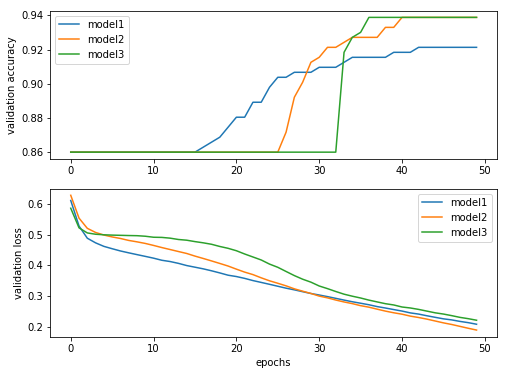

In [71]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

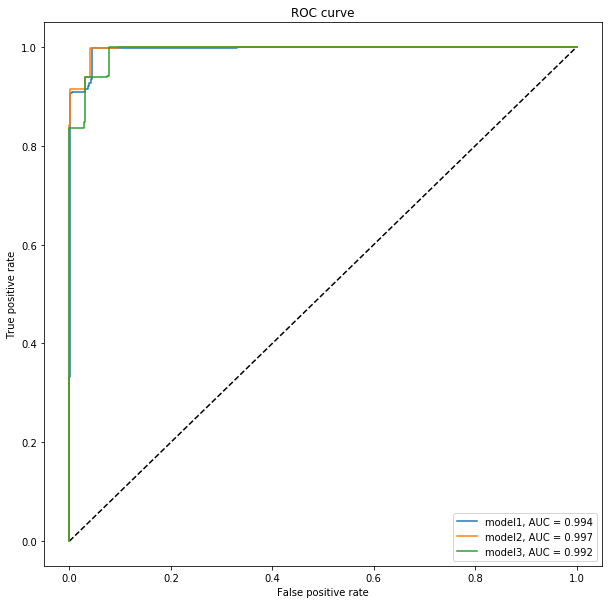

In [72]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

# Model 2 gave the best results